In [195]:
import numpy as np
from scipy.linalg import expm
import afqmc
import importlib
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time


importlib.reload(afqmc)
from afqmc import *

In [196]:
# 使用例
U = 4
mu = U / 2
L = 50
N = 10
dimension = 2
size = N**dimension
# s = -np.ones((L, size))
# sはL×Nの行列で、要素は1か-1
s = np.random.choice([-1, 1], size=(L, size))
p = {
    "N": N,
    "L": L,
    "beta": 3,
    "t": 1.0,
    "U": U,
    "mu": mu,
    "s": s,
    "dimension": dimension,
}

In [197]:
n_stab = 1
M = 10
Szz_beta = []
afqmcs = []
for beta in range(6):
    Szz = np.zeros((N, N))
    # Szz = np.zeros((N))
    p["beta"] = beta
    afqmc = AFQMC(**p)
    for m in range(M):
        print(beta, m)
        for l in reversed(range(L)):
            if l % n_stab == 0:
                afqmc.stabilize(l)
            afqmc.i_sweep(l)
            afqmc.time_update_green_function(l)
        if m > 3:
            Szz += np.array(
                [[afqmc.make_Szz_2d(i, j) for i in range(N)] for j in range(N)]
            )
            # Szz += np.array([afqmc.make_Szz_1d(i) for i in range(N)])
    afqmcs.append(afqmc)
    Szz /= M - 4
    Szz_beta.append(Szz)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9


In [ ]:
for beta in range(6):
    print(np.trace(afqmcs[beta].G_up[0]))

In [186]:
for beta in range(6):
    print(np.trace(afqmcs[beta].G_up[0]))

50.0
46.968549036373595
50.39407404085753
53.53873085773219
52.2503828413102
50.549782421604256


In [187]:
afqmc.G_up[0].dtype

dtype('float64')

0
1
2
3
4
5


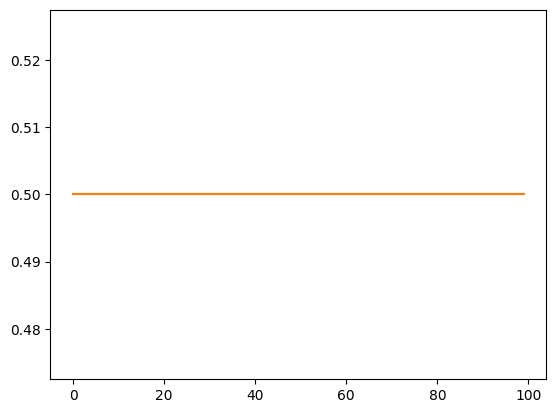

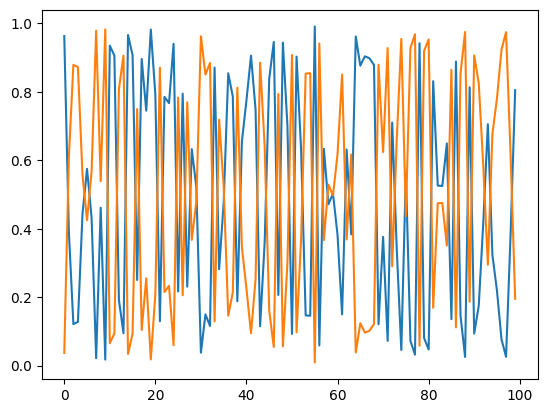

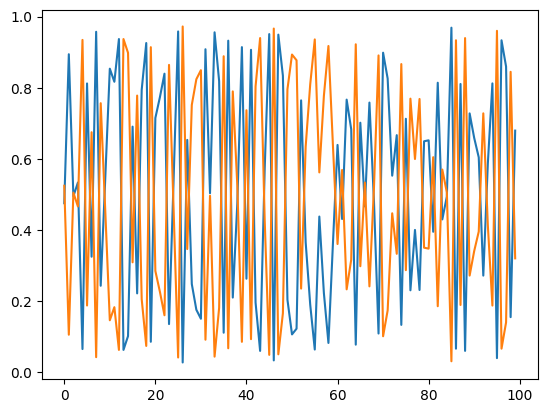

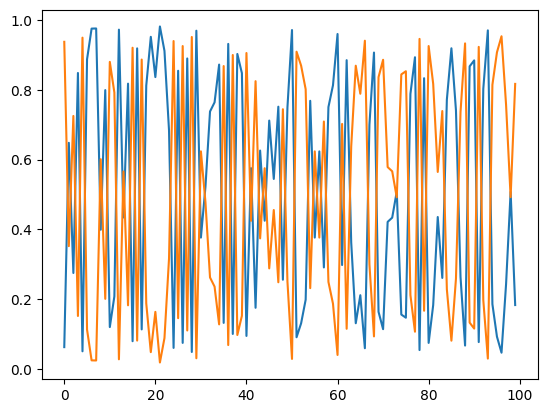

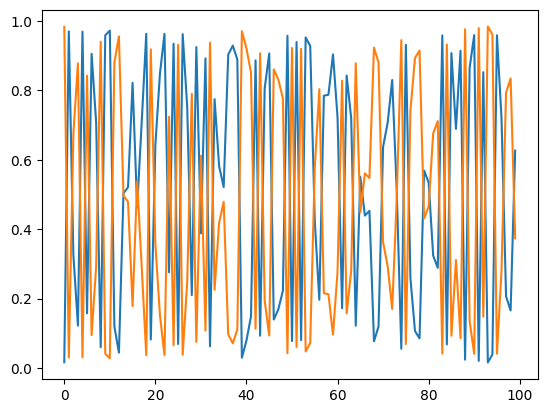

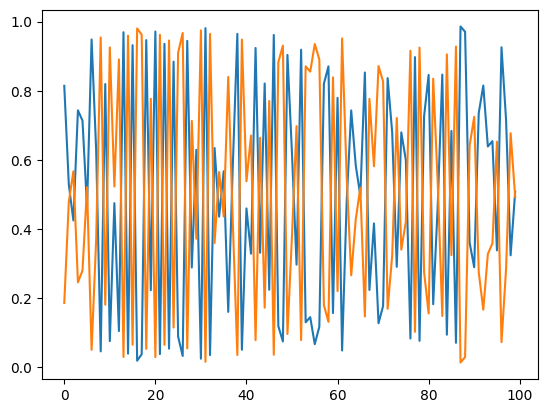

In [188]:
for beta in range(6):
    print(beta)
    fig, ax = plt.subplots()
    ax.plot(np.diag(afqmcs[beta].G_up[L // 2]))
    ax.plot(np.diag(afqmcs[beta].G_dn[L // 2]))

In [189]:
print(
    np.trace(afqmc.G_up[L // 2]) / afqmc.size, np.trace(afqmc.G_dn[L // 2]) / afqmc.size
)

0.4979724215328162 0.5027619203625339


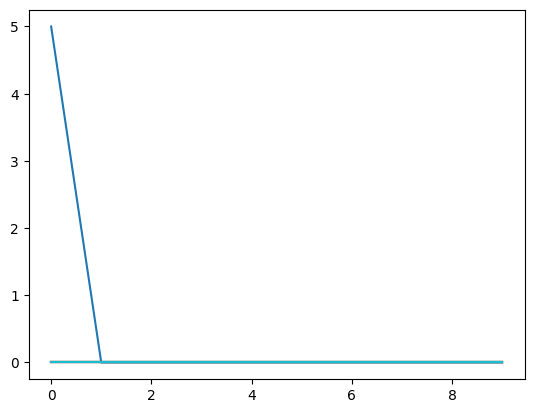

In [190]:
fig, ax = plt.subplots()
ax.plot(np.arange(N), Szz_beta[0], label="beta=5")

In [191]:
afqmc.make_Szz_pi(Szz)

array([ 1.44766585, -0.74733144,  0.48034886, -0.28672245,  0.25012758,
       -0.24876417,  0.25012758, -0.28672245,  0.48034886, -0.74733144])

In [192]:
Szz_pipi_beta = [afqmc.make_Szz_pipi(Szz) for Szz in Szz_beta]

In [193]:
Szz_pipi_beta

[0.05,
 0.23687756506642682,
 0.12458229481475856,
 0.40670032135620976,
 0.21109490491869717,
 0.5225490679785127]

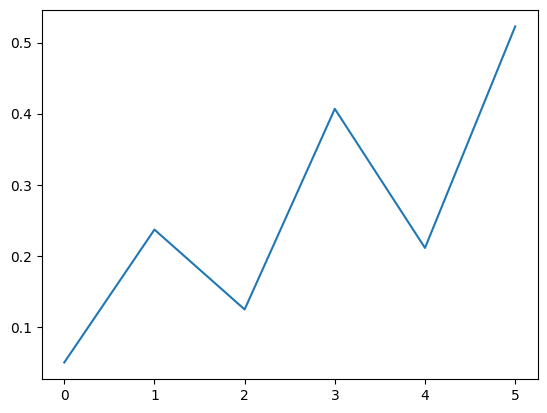

In [194]:
fig, ax = plt.subplots()
ax.plot(range(6), Szz_pipi_beta)